In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [3]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
clf = DecisionTreeClassifier()

### RandomizedSearchCV

In [6]:
param_distributions = {
    "max_depth": [3, None],
    "max_features": range(1, 11),
    "min_samples_split": range(2, 11),
    "criterion": ['gini', 'entropy'],
}

In [7]:
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=10, cv=5)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [8]:
random_search.best_estimator_

DecisionTreeClassifier(max_features=7, min_samples_split=10)

In [9]:
random_search.best_params_

{'min_samples_split': 10,
 'max_features': 7,
 'max_depth': None,
 'criterion': 'gini'}

In [10]:
random_search.best_score_

0.9106349206349206

In [11]:
random_search.cv_results_

{'mean_fit_time': array([0.00313077, 0.00312467, 0.        , 0.00312381, 0.00312433,
        0.        , 0.        , 0.        , 0.00312424, 0.        ]),
 'std_fit_time': array([0.00626154, 0.00624933, 0.        , 0.00624762, 0.00624866,
        0.        , 0.        , 0.        , 0.00624847, 0.        ]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00312419, 0.        , 0.00312428, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00624838, 0.        , 0.00624857, 0.        , 0.        ]),
 'param_min_samples_split': masked_array(data=[3, 7, 2, 10, 3, 9, 8, 6, 5, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[8, 8, 5, 7, 3, 10, 3, 1, 3, 2],
              mask=[False, False, False, False, False, False, 

### GridSearchCV

In [12]:
param_grid = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "criterion": ["gini", "entropy"],
}

In [13]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [14]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=3,
                       min_samples_split=10)

In [15]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 10}

In [16]:
grid_search.best_score_

0.9438095238095237

### Decision Tree

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
Better_model = DecisionTreeClassifier(criterion = "entropy",
                                      max_depth = None,
                                      max_features = 10,
                                      min_samples_split = 3)
Better_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=10,
                       min_samples_split=3)

In [19]:
y_pred = Better_model.predict(X_test)

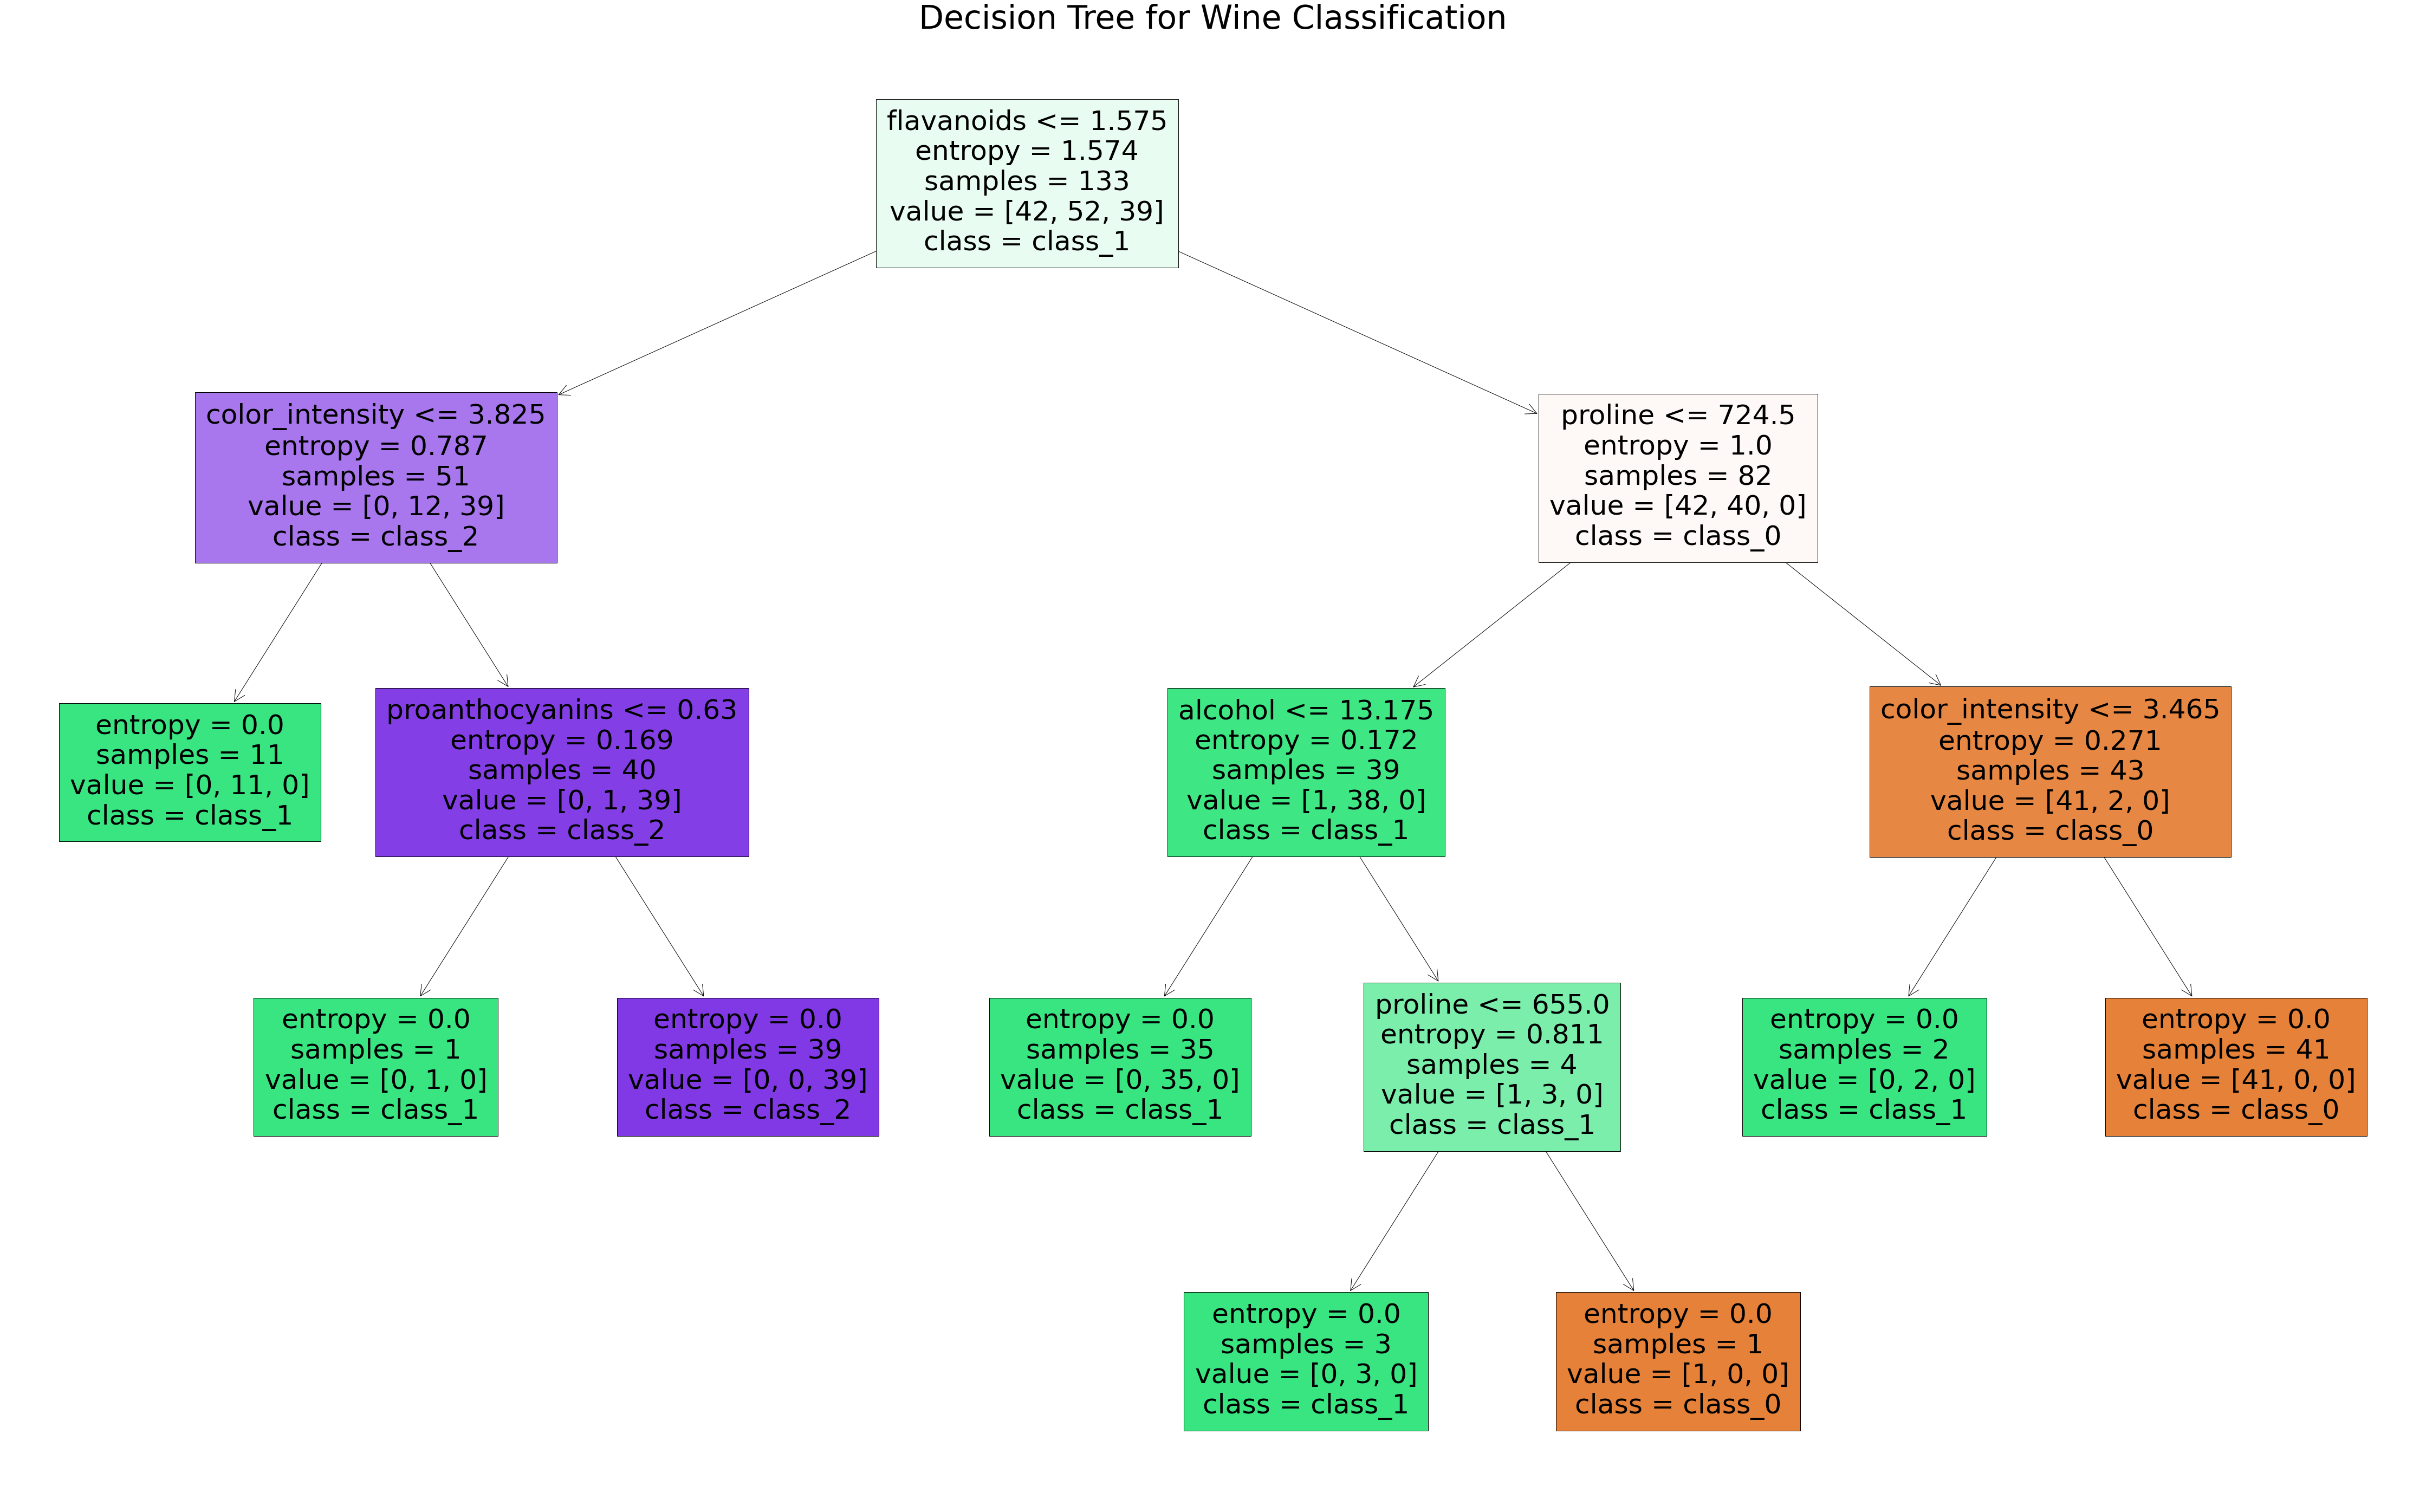

In [20]:
plt.figure(figsize=(80, 50))
plot_tree(Better_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree for Wine Classification", fontsize=60)
plt.show()

In [21]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [22]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 19,  0],
       [ 0,  1,  8]], dtype=int64)